In [1]:
import sys

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import sys
reload(sys)
sys.setdefaultencoding('utf8')
%matplotlib inline

In [3]:
!ls data

In [4]:
data = pd.read_csv('data/winemag-data_first150k.csv')

In [5]:
data.info()

In [6]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
data.isnull().sum(axis=0)

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [8]:
data[data['country'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [9]:
data = data.dropna(axis=0, subset=['country'])
data[data['country'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery


In [10]:
data = data.dropna(axis=0, subset=['price'])
data[data['country'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery


In [11]:
data = data.drop('region_2', axis=1)

In [12]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [13]:
data['description'].duplicated().sum(axis=0)

48125

In [14]:
data[data.duplicated('description', keep=False)].sort_values('description').head(15)

,country,description,designation,points,price,province,region_1,variety,winery
147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister
53110,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister
84730,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister
65231,France,. From a small south-facing parcel next to the...,Trie Spéciale,91,38.0,Loire Valley,Savennières,Chenin Blanc,Domaine des Baumard
107351,France,. From a small south-facing parcel next to the...,Trie Spéciale,91,38.0,Loire Valley,Savennières,Chenin Blanc,Domaine des Baumard
102414,Germany,. Lemon zest and exotic spices enliven the nos...,Bernkasteler Badstube Kabinett,86,22.0,Mosel,NaN,Riesling,Dr. Pauly Bergweiler


In [15]:
df = data.drop_duplicates('description')
df.info()

In [16]:
data.variety.value_counts()[:15]

Chardonnay                  13775
Pinot Noir                  13625
Cabernet Sauvignon          12671
Red Blend                    9377
Sauvignon Blanc              6054
Syrah                        5667
Riesling                     5212
Merlot                       4987
Bordeaux-style Red Blend     4545
Zinfandel                    3794
Malbec                       3085
Sangiovese                   2879
White Blend                  2554
Tempranillo                  2525
Rosé                         2461
Name: variety, dtype: int64

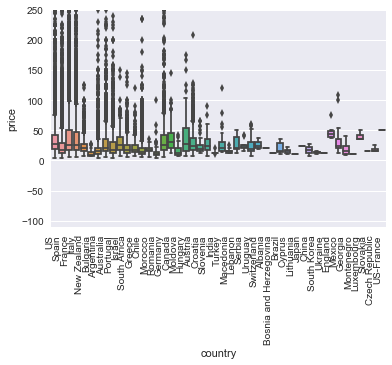

In [17]:
sns.boxplot(x="country", y="price", data=df, width=0.8)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_ybound(lower=None, upper=250)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

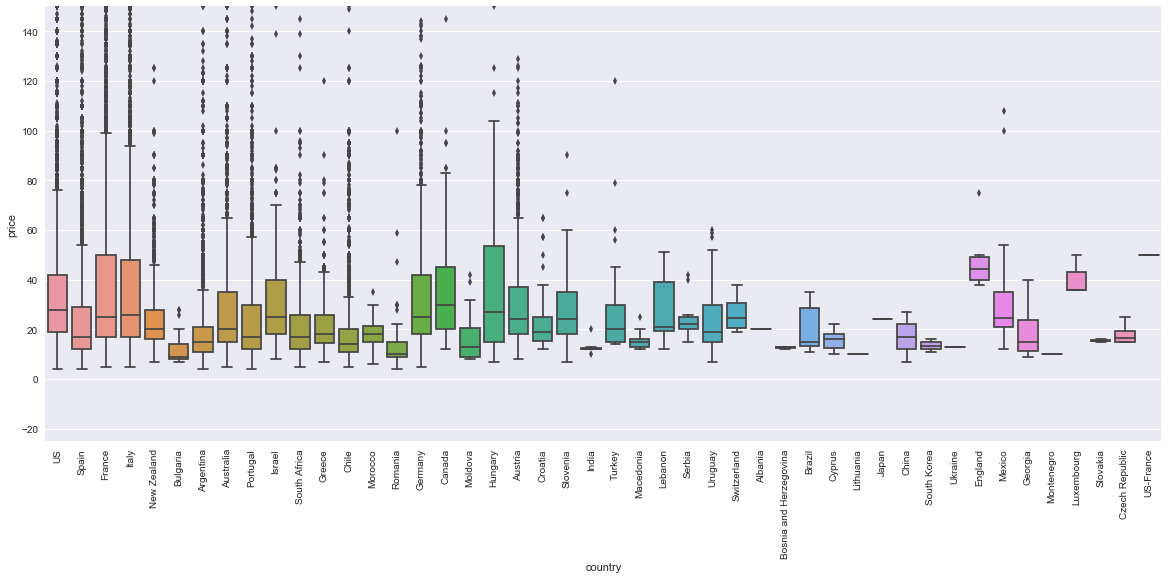

In [18]:
fig, ax = plt.subplots(figsize = (20, 8))
plot = sns.boxplot(x="country", y="price", data=df, width=0.8, ax = ax)
ax.set_ybound(lower=-25, upper=150)
plt.xticks(rotation=90)

In [19]:
df.describe().round(2)

,points,price
count,89105.00,89105.00
mean,87.87,33.66
std,3.22,37.67
min,80.00,4.00
25%,86.00,16.00
50%,88.00,25.00
75%,90.00,40.00
max,100.00,2300.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text xticklabel objects>)

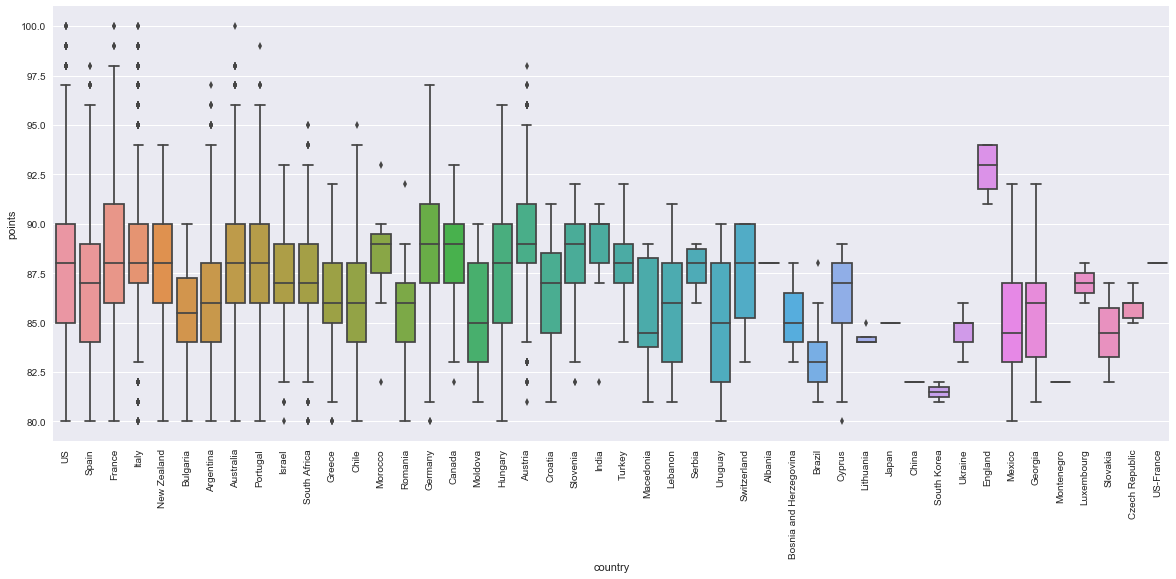

In [21]:
fig, ax = plt.subplots(figsize = (20, 8))
plot = sns.boxplot(x="country", y="points", data=df, width=0.8, ax = ax)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

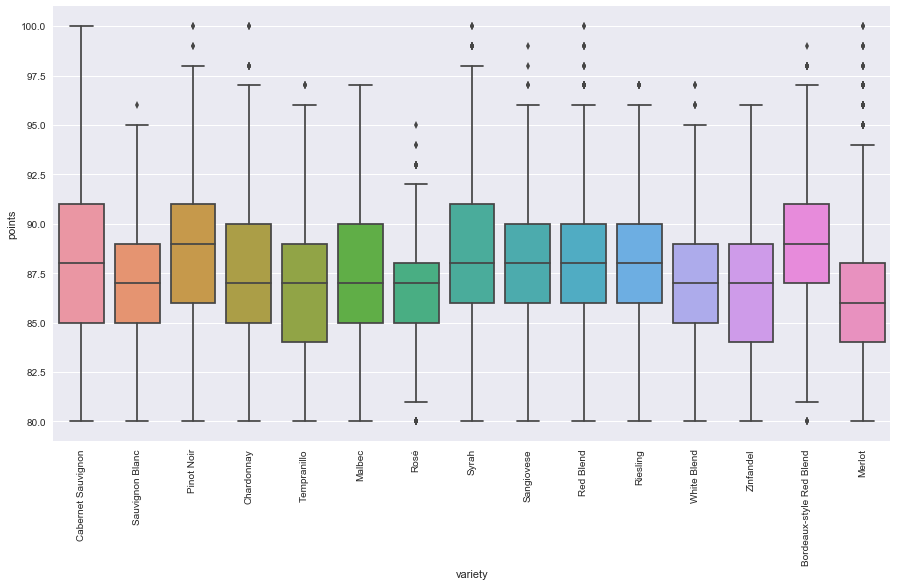

In [22]:
df_var = data.groupby('variety').filter(lambda x: len(x) >2400)

df4 = pd.DataFrame({col:vals['points'] for col,vals in data.groupby('variety')})
meds3 = df4.median()
meds3.sort_values(ascending=False, inplace=True)

fig2, ax2 = plt.subplots(figsize = (15, 8))
plot = sns.boxplot(x="variety", y="points", data=df_var, width=0.8, ax = ax2)
plt.xticks(rotation=90)

In [25]:
print meds3

In [26]:
avg_price = pd.pivot_table(df, values=("price", "points"), index="country", aggfunc='mean')
avg_price.sort_values(by="points", ascending=False)

,points,price
country,,
England,92.750000,47.500000
Austria,89.337093,31.091479
Germany,88.831309,42.537787
Canada,88.716216,36.040541
France,88.632266,44.910644
Italy,88.450379,37.896066
India,88.428571,13.000000
Morocco,88.272727,19.181818
Portugal,88.256787,27.619222


In [27]:
import statsmodels.formula.api as smf

lin_model = smf.ols(formula='points ~ price', data=df).fit()
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                 2.229e+04
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:26:25   Log-Likelihood:            -2.2074e+05
No. Observations:               89105   AIC:                         4.415e+05
Df Residuals:                   89103   BIC:                         4.415e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.5807      0.013   6687.550      0.000      86.555      86.606
price          0.0383      0.000    149.282      0.000       0.038       0.039
==============================================================================
Omnibus:                    26783.717   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           759914.709
Skew:                          -0.851   Prob(JB):                         0.00
Kurtosis:                      17.205   Cond. No.                         67.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
data.isnull().sum(axis=0)

country            0
description        0
designation    42311
points             0
price              0
province           0
region_1       22837
variety            0
winery             0
dtype: int64

In [29]:
price_point = df[['price', 'points']].copy()
price_point.sort_values(by="price", ascending=False)

,price,points
34920,2300.0,99
13318,2013.0,91
34922,1900.0,98
26296,1400.0,100
34939,1300.0,96
34942,1200.0,96
34927,1100.0,97
10651,1100.0,94
35531,1000.0,94
10886,980.0,94


In [30]:
df[df['price'] == 4]

,country,description,designation,points,price,province,region_1,variety,winery
1858,US,"Sweet and fruity, this canned wine feels soft ...",Unoaked,83,4.0,California,California,Chardonnay,Pam's Cuties
25645,US,"There's a lot going on in this Merlot, which i...",NaN,86,4.0,California,California,Merlot,Bandit
34415,Spain,This opens with standard cherry and berry arom...,NaN,84,4.0,Levante,Yecla,Cabernet Sauvignon,Terrenal
34682,Spain,"Nice on the nose, this has a leafy note and a ...",Estate Bottled,84,4.0,Levante,Yecla,Tempranillo,Terrenal
36716,Argentina,"Crimson in color but also translucent, with a ...",Red,84,4.0,Mendoza Province,Mendoza,Malbec-Syrah,Broke Ass
73417,Romania,Notes of sun-dried hay and green flower highli...,UnWineD,86,4.0,Viile Timisului,NaN,Pinot Grigio,Cramele Recas
90546,Argentina,Clean as anyone should reasonably expect given...,NaN,85,4.0,Mendoza Province,Mendoza,Malbec,Toca Diamonte
99045,Portugal,"This is a ripe-fruited wine, rich with dried f...",Toutalga,86,4.0,Alentejano,NaN,Portuguese Red,Herdade dos Machados
114167,US,"Easy, simple peach and strawberry flavors are ...",White Zinfandel,83,4.0,California,California,Zinfandel,Round Hill
118347,US,"Light and earthy, this wine-in-a-box is clean ...",NaN,84,4.0,California,California,Cabernet Sauvignon,Bandit


,points,price
points,1.000000,0.447288
price,0.447288,1.000000


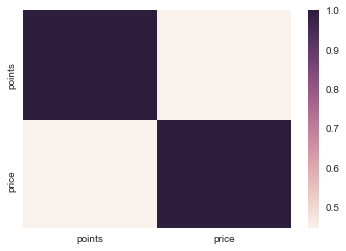

In [31]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt
corr

In [32]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split
import spacy
from spacy.en import English
import gensim
from gensim.models.word2vec import Word2Vec

nlp_toolkit = English()

In [33]:
df.variety.value_counts()[:10]

Pinot Noir                  8801
Chardonnay                  8696
Cabernet Sauvignon          8182
Red Blend                   6072
Sauvignon Blanc             3871
Syrah                       3572
Riesling                    3384
Bordeaux-style Red Blend    3240
Merlot                      3131
Zinfandel                   2403
Name: variety, dtype: int64

In [34]:
toplist = ['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Sauvignon Blanc', 'Syrah', 'Riesling', 'Bordeaux-style Red Blend', 'Merlot', 'Zinfandel']

In [35]:
subdata = df[df['variety'].isin(toplist)]

In [36]:
subdata.variety.value_counts()[:15]

Pinot Noir                  8801
Chardonnay                  8696
Cabernet Sauvignon          8182
Red Blend                   6072
Sauvignon Blanc             3871
Syrah                       3572
Riesling                    3384
Bordeaux-style Red Blend    3240
Merlot                      3131
Zinfandel                   2403
Name: variety, dtype: int64

In [37]:
wine_var = subdata.variety.unique().tolist()
wine_var.sort()
wine_var[:20]

['Bordeaux-style Red Blend',
 'Cabernet Sauvignon',
 'Chardonnay',
 'Merlot',
 'Pinot Noir',
 'Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Zinfandel']

In [38]:
output = set()
for x in subdata.variety:
    x = x.lower()
    x = x.split()
    for y in x:
        output.add(y)

variety_list = sorted(output)
variety_list[:20]

['blanc',
 'blend',
 'bordeaux-style',
 'cabernet',
 'chardonnay',
 'merlot',
 'noir',
 'pinot',
 'red',
 'riesling',
 'sauvignon',
 'syrah',
 'zinfandel']

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(subdata['variety'])
label_encoded_y = label_encoder.transform(subdata['variety'])
subdata['encoded_winevariety'] = label_encoded_y
subdata.head()

,country,description,designation,points,price,province,region_1,variety,winery,encoded_winevariety
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,1
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,7
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,4
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Pinot Noir,Bergström,4
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Pinot Noir,Blue Farm,4


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=100, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(subdata["description"])

In [42]:
features = tfidf.get_feature_names()

In [53]:
print (features)

In [43]:
X_tfidf_text = tfidf.transform(subdata["description"])
subdata_2 = pd.DataFrame(X_tfidf_text.toarray())
subdata = subdata.reset_index()
subdata_2['encoded_winevariety'] = subdata['encoded_winevariety']
subdata_2['variety'] = subdata['variety']

In [44]:
from sklearn.cross_validation import train_test_split
seed = 7

test_size = 0.2
y = subdata_2['encoded_winevariety']
X = subdata_2.drop(['encoded_winevariety','variety'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)

In [45]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print('Accuracy Score:',accuracy_score(y_pred, y_test)*100,"%")